<a href="https://colab.research.google.com/github/Athena112233/sargadom_mapview/blob/surabhi_map/crtd_mapview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Costa Rica Thermal Dome

In [1]:

!pip install gcsfs
!pip install zarr 
!pip install xarray[complete]
!pip install ecmwflibs
!pip install rioxarray
!pip install geopandas
!pip install cfgrib
!pip install netCDF4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.11.0
    Uninstalling fsspec-2022.11.0:
      Successfully uninstalled fsspec-2022.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=6aa7e75bb3506ce974b1bfa7fd33a1ed4a36ad0ea67c428b0c1deee8901962cf
  Stored in directory: /root/.cache/pip/wheels/a3/d7/75/19cd0d2a893cad4bb0b2b16dd572ad2916d19c0d5ee9612511
Successfully built asciitree
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [3]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 42.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp38-cp38-linux_x86_64.whl size=11127993 sha256=af6254d11eb5abd131788537d3e3ae258a0c25a864c6b28cfe403983af5e186a
  Stored in directory: /root/.cache/pip/wheels/7c/ff/6f/09e4aa53f4e67d6498ef1d33dd4ea9c8c165817b9ddcc31d28
Successfully built cartopy


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import netCDF4
import rioxarray
import xarray as xr
import zarr
import fsspec
import gcsfs
import rioxarray as rio 
import ecmwflibs
import cfgrib
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 10 Years Annual
1. sst245_short_diff
2. sst245_long_diff
3. sst370_short_diff
4. sst370_long_diff
5. sst585_short_diff
6. sst585_long_diff

In [6]:
path = "/content/drive/MyDrive/MGEL_Capstone/Outputs/tos/crtd/"

# read SSP245
short_245 = xr.open_rasterio(path + "crtd_sst245_short_diff.tiff")
short_245 = short_245.to_dataset('band')
short_245 = short_245.rename({1:'tos'})
short_245 = short_245.rio.write_crs(4326, inplace=True)

long_245 = xr.open_rasterio(path + "crtd_sst245_long_diff.tiff")
long_245 = long_245.to_dataset('band')
long_245 = long_245.rename({1:'tos'})
long_245 = long_245.rio.write_crs(4326, inplace=True)

# read SSP370
short_370 = xr.open_rasterio(path + "crtd_sst370_short_diff.tiff")
short_370 = short_370.to_dataset('band')
short_370 = short_370.rename({1:'tos'})
short_370 = short_370.rio.write_crs(4326, inplace=True)

long_370 = xr.open_rasterio(path + "crtd_sst370_long_diff.tiff")
long_370 = long_370.to_dataset('band')
long_370 = long_370.rename({1:'tos'})
long_370 = long_370.rio.write_crs(4326, inplace=True)

# read SSP585
short_585 = xr.open_rasterio(path + "crtd_sst585_short_diff.tiff")
short_585 = short_585.to_dataset('band')
short_585 = short_585.rename({1:'tos'})
short_585 = short_585.rio.write_crs(4326, inplace=True)

long_585 = xr.open_rasterio(path + "crtd_sst585_long_diff.tiff")
long_585 = long_585.to_dataset('band')
long_585 = long_585.rename({1:'tos'})
long_585 = long_585.rio.write_crs(4326, inplace=True)

In [7]:
# read eez and area of collaboration
bound_path = "/content/drive/MyDrive/MGEL_Capstone/Outputs/boundaries/"
eez = gpd.read_file(bound_path + "eez_boundaries_v11.shp")
eez = eez.to_crs('epsg:4326')
gac = gpd.read_file(bound_path + "CRTD_Geographical_Area_of_Collaboration.shp")
gac = gac.to_crs('epsg:4326')

In [13]:
"""
labels = ['0.7 g/m$^2$', '0.4 g/m$^2$']
for i in range(len(labels)): 
    CS.collections[i].set_label(labels[i])
plt.legend(loc='lower left',prop={'size': 6})
"""

"\nlabels = ['0.7 g/m$^2$', '0.4 g/m$^2$']\nfor i in range(len(labels)): \n    CS.collections[i].set_label(labels[i])\nplt.legend(loc='lower left',prop={'size': 6})\n"

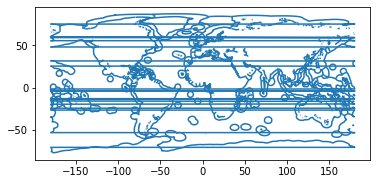

In [14]:
eez.plot()

In [8]:
# define plots setting

def plot(datasets, title, fig_title):
    c_colors = ['lime','aqua']
    fig = plt.figure(figsize=(15,6), tight_layout=True)
    title_text = fig_title
    fig.suptitle(title_text)

    for pos, dataset, title in zip(range(1, 7), datasets, title):
        ax = fig.add_subplot(2, 3, pos, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND, zorder=10)
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)

        dataset.tos.plot(cmap="coolwarm", vmin=-4, vmax=4, add_colorbar=False)
        CS = dataset.tos.plot.contour(levels=[0.5,1,0], colors=c_colors, linewidths=.8, add_labels=True)

        #eez.plot(edgecolor="dimgrey", facecolor="none", linewidth=0.7, ax=ax)
        gac.plot(edgecolor="grey", facecolor="none", linewidth=0.7, ax=ax) 

        ax.set_xlim(-112, -77) 
        ax.set_ylim(0,20)
        ax.set_title(title)
        
    return fig

In [9]:
dataset= short_245

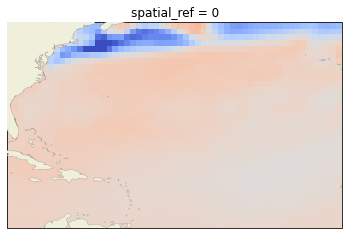

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=10)
ax.add_feature(cfeature.COASTLINE, linewidth=0.2, edgecolor="dimgrey", zorder=11)
dataset.tos.plot(cmap="coolwarm", vmin=-4, vmax=4, add_colorbar=False, ax=ax)

In [11]:
fig = plt.figure(figsize=(15,6), tight_layout=True)

<Figure size 1080x432 with 0 Axes>

### Plot 10 Year Mean

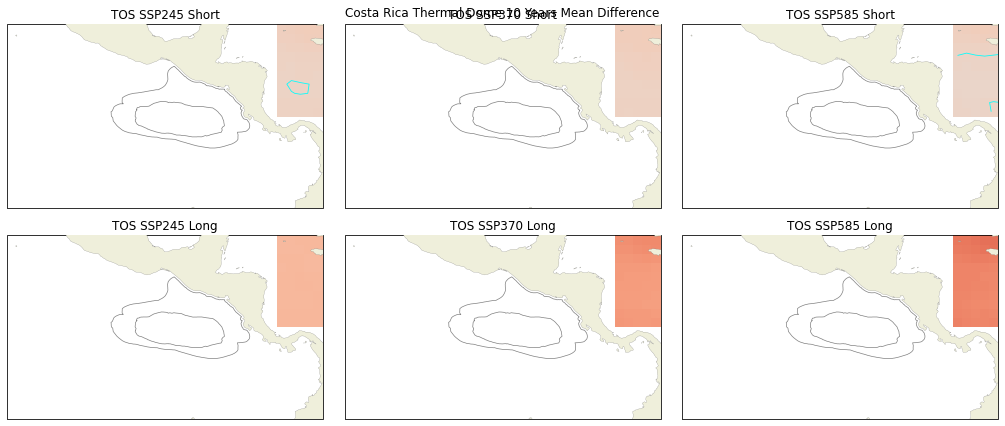

In [12]:
fig_title = 'Costa Rica Thermal Dome 10 Years Mean Difference'
datasets = [short_245, short_370, short_585, long_245, long_370, long_585]
title = ["TOS SSP245 Short", "TOS SSP370 Short", "TOS SSP585 Short",
         "TOS SSP245 Long", "TOS SSP370 Long", "TOS SSP585 Long"]

fig = plot(datasets, title, fig_title)

# define save path
# save_path = "../outputs/sargasso"
fig_name = "crtd_tos_10_years_mean_diff.jpg"
#fig.savefig(save_path + fig_name)

### Plot 12 months

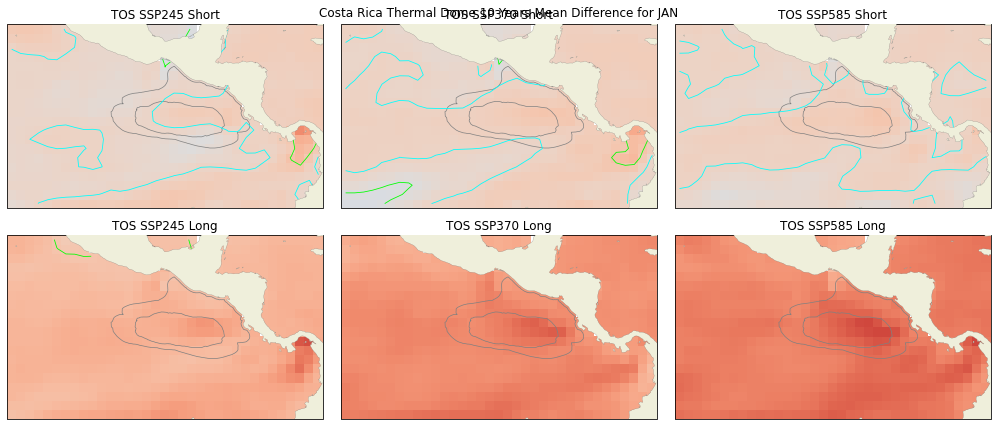

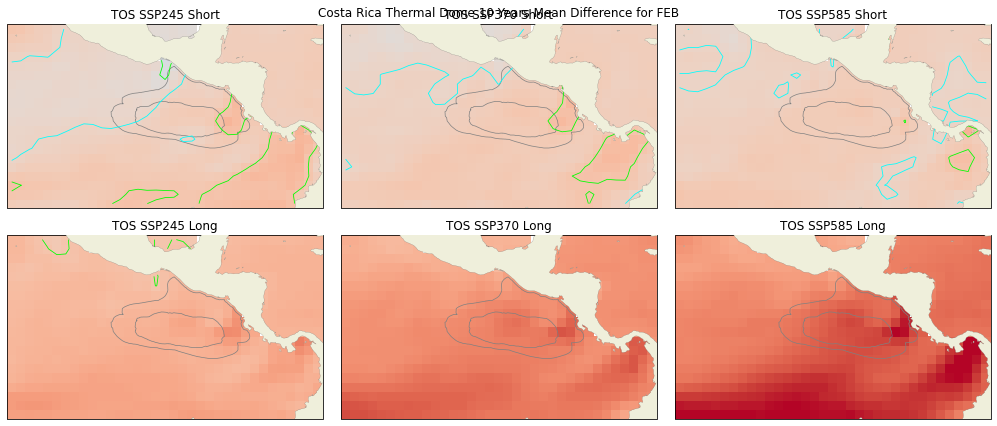

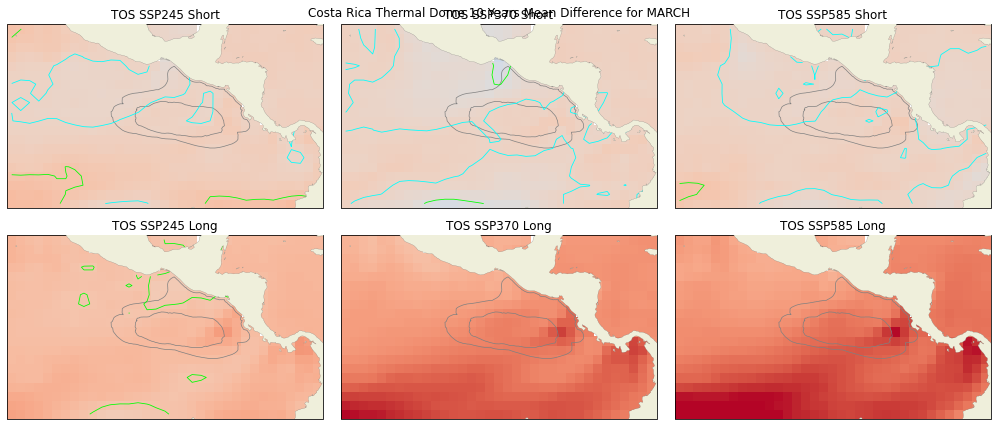

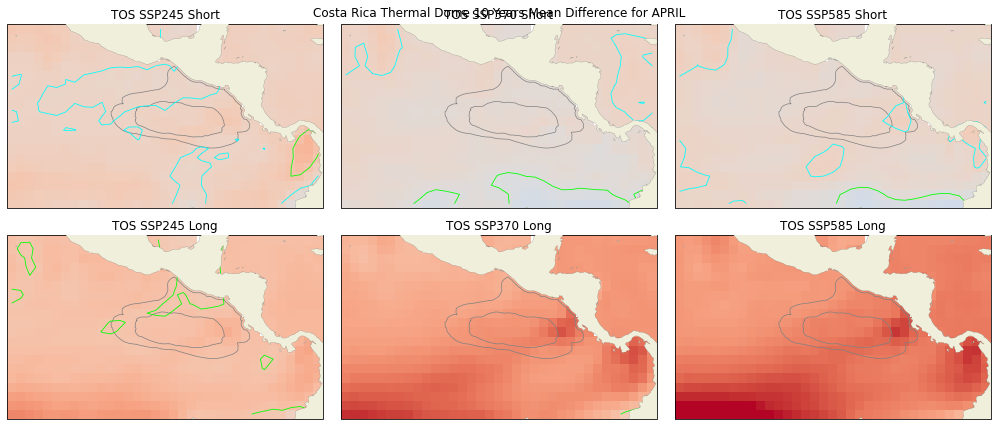

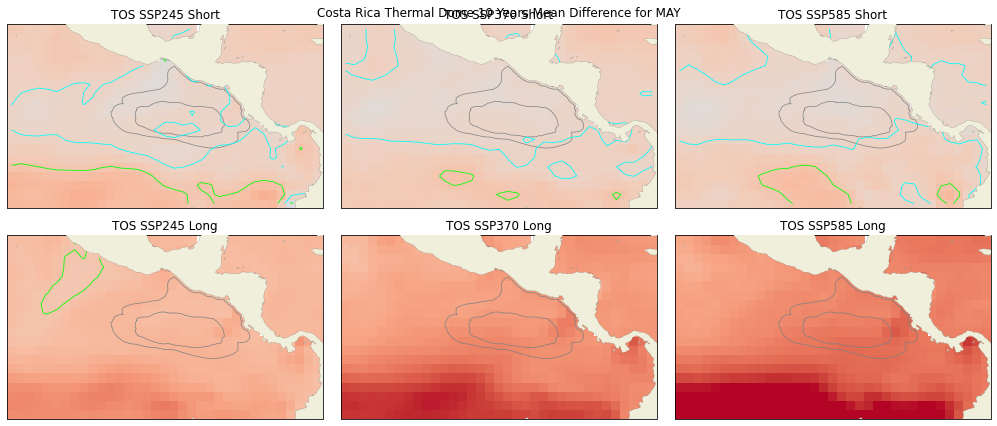

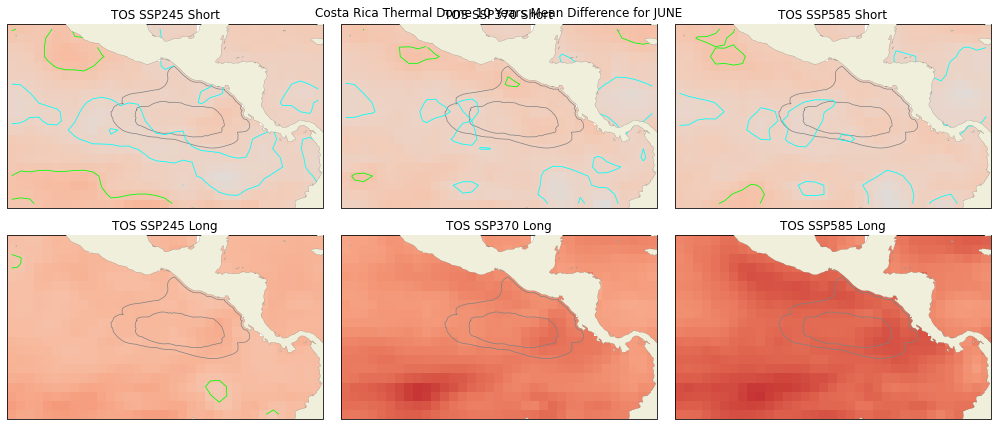

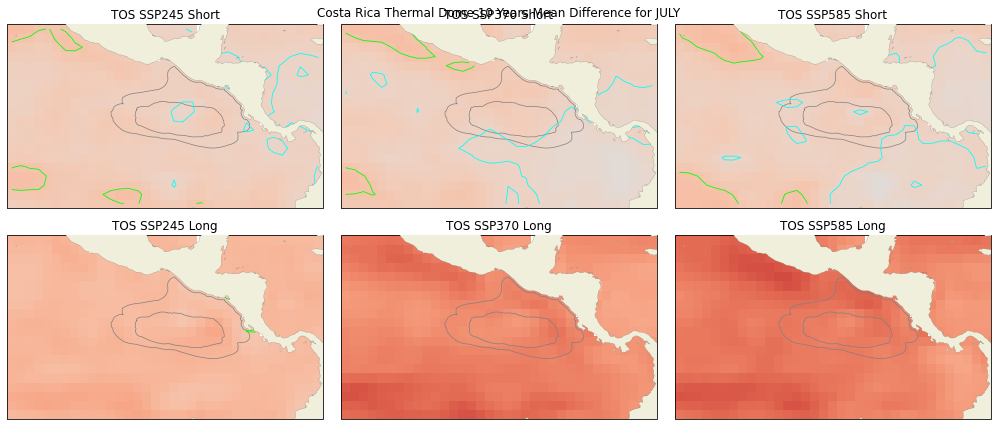

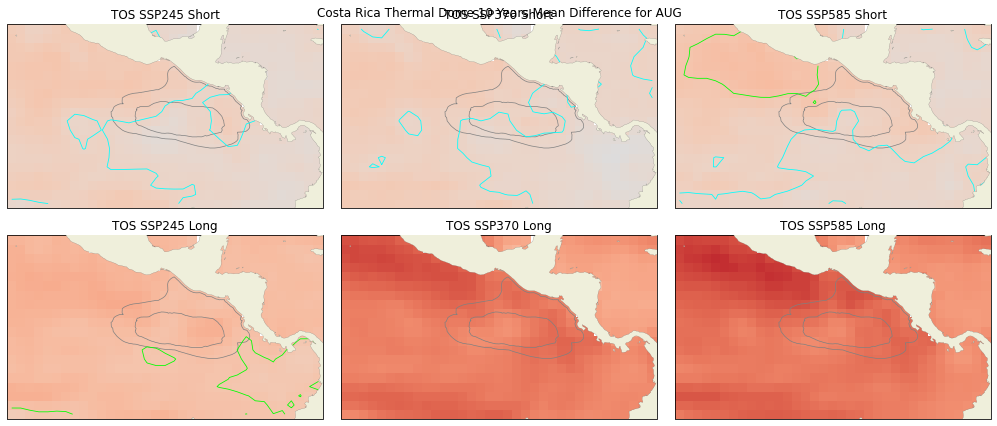

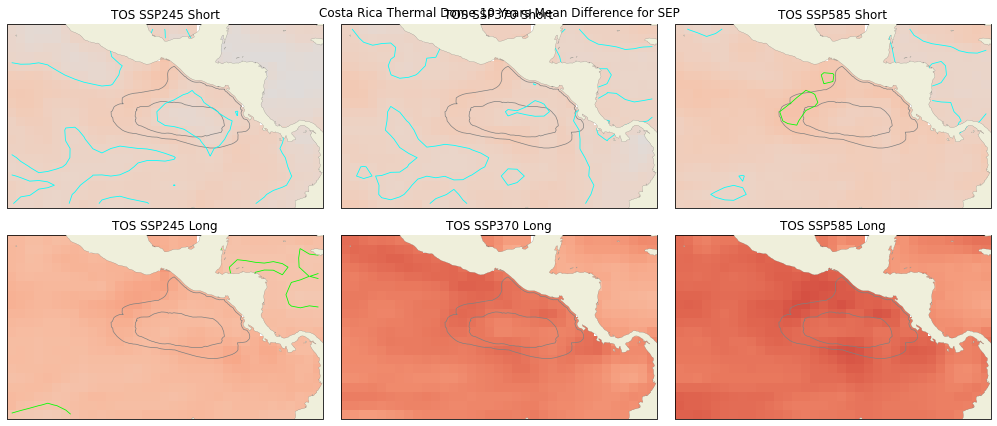

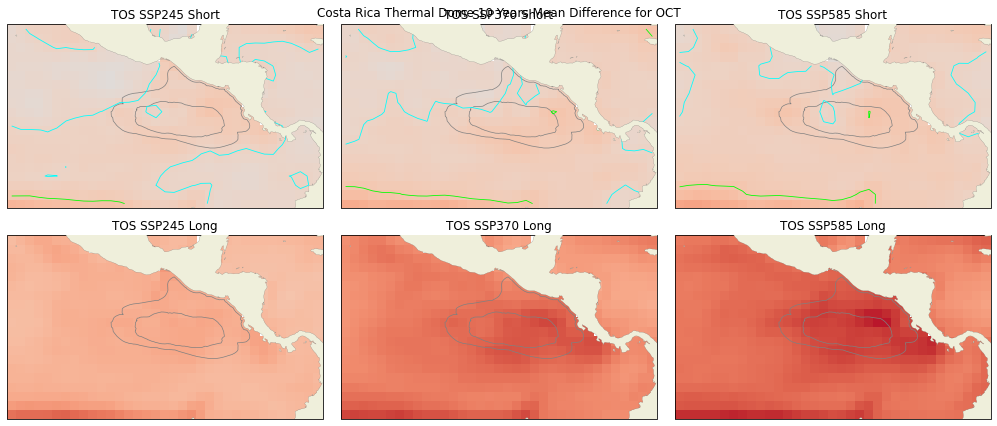

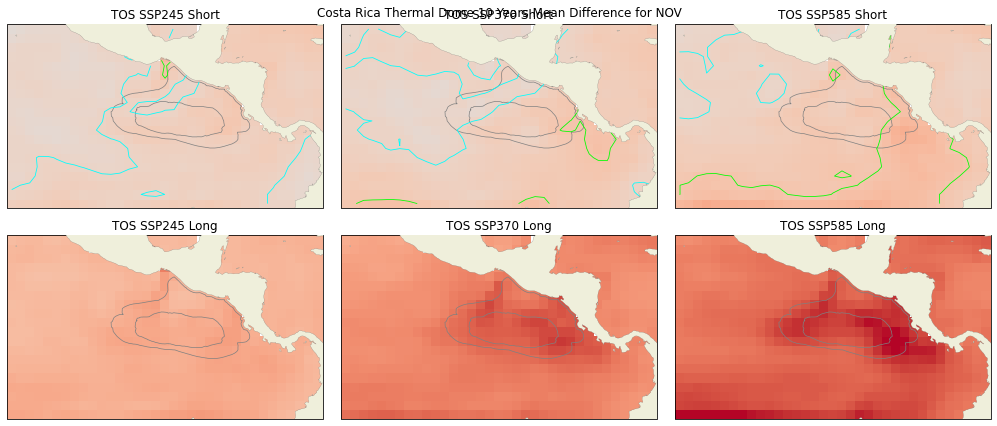

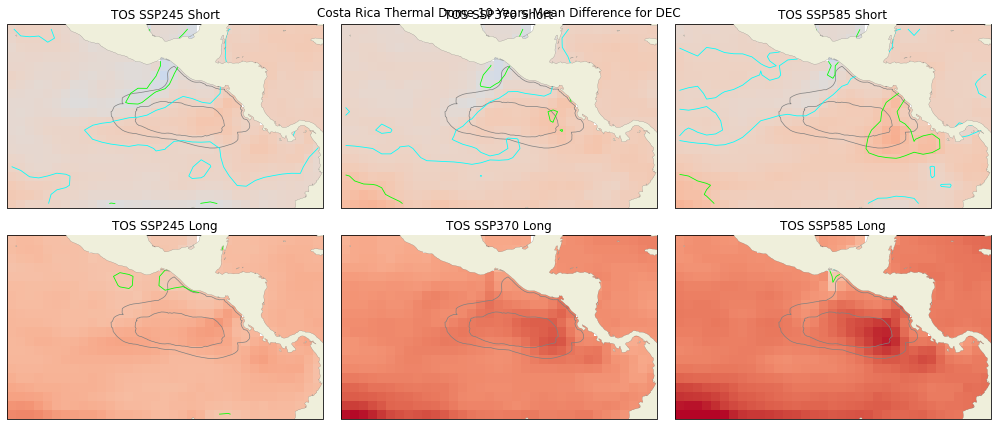

In [13]:
# automate plotting process
# read 12 months of data
months = {
    'jan': 1,
    'feb': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'aug': 8, 
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

for month in months.keys():
    # read crtd tos data files for each month
    path = f"/content/drive/MyDrive/MGEL_Capstone/Outputs/tos/crtd/{month}/"
    
    # read SSP245
    short_245 = xr.open_rasterio(path + f"crtd_{month}_sst245_short_diff.tiff")
    short_245 = short_245.to_dataset('band')
    short_245 = short_245.rename({1:'tos'})
    short_245 = short_245.rio.write_crs(4326, inplace=True)

    long_245 = xr.open_rasterio(path + f"crtd_{month}_sst245_long_diff.tiff")
    long_245 = long_245.to_dataset('band')
    long_245 = long_245.rename({1:'tos'})
    long_245 = long_245.rio.write_crs(4326, inplace=True)

    # read SSP370
    short_370 = xr.open_rasterio(path + f"crtd_{month}_sst370_short_diff.tiff")
    short_370 = short_370.to_dataset('band')
    short_370 = short_370.rename({1:'tos'})
    short_370 = short_370.rio.write_crs(4326, inplace=True)

    long_370 = xr.open_rasterio(path + f"crtd_{month}_sst370_long_diff.tiff")
    long_370 = long_370.to_dataset('band')
    long_370 = long_370.rename({1:'tos'})
    long_370 = long_370.rio.write_crs(4326, inplace=True)

    # read SSP585
    short_585 = xr.open_rasterio(path + f"crtd_{month}_sst585_short_diff.tiff")
    short_585 = short_585.to_dataset('band')
    short_585 = short_585.rename({1:'tos'})
    short_585 = short_585.rio.write_crs(4326, inplace=True)

    long_585 = xr.open_rasterio(path + f"crtd_{month}_sst585_long_diff.tiff")
    long_585 = long_585.to_dataset('band')
    long_585 = long_585.rename({1:'tos'})
    long_585 = long_585.rio.write_crs(4326, inplace=True)
    
    # after reading the files, plot maps
    fig_title = f'Costa Rica Thermal Dome 10 Years Mean Difference for {month.upper()}'
    datasets = [short_245, short_370, short_585, long_245, long_370, long_585]
    title = ["TOS SSP245 Short", "TOS SSP370 Short", "TOS SSP585 Short",
             "TOS SSP245 Long", "TOS SSP370 Long", "TOS SSP585 Long"]
    fig = plot(datasets, title, fig_title)
    
    #save_path = '../outputs/sargasso/'
    #fig_name = f"sargasso_tos_10_years_mean_diff_{month}.jpg"
    #fig.savefig(save_path + fig_name)